# GSEA and plotting in python: ANANSE Zeb2 target genes in Kupffer cells


In [1]:
!pip install gseapy

In [1]:
import pandas as pd
from gseapy.plot import gseaplot
import gseapy as gp
import numpy as np

In [3]:
df_ANANSE_Zeb2 = pd.read_csv('../Results/ANANSE_network/KC/ANANSE_network_Zeb2_finalScore.tsv', sep='\t').dropna()

# df_ANANSE_Zeb2['target'] = df_ANANSE_Zeb2['target'].str.upper()
# df_ANANSE_Zeb2['tf'] = df_ANANSE_Zeb2['tf'].str.upper()

df_ANANSE_Zeb2 = df_ANANSE_Zeb2.rename(columns = {'is.target.a.TF': 'is_target_a_TF'})

df_ANANSE_Zeb2 = df_ANANSE_Zeb2.rename(columns = {'rank.pct_diff': 'rank_pct_diff'})
df_ANANSE_Zeb2 = df_ANANSE_Zeb2.rename(columns = {'rank.FC': 'rank_FC'})
df_ANANSE_Zeb2 = df_ANANSE_Zeb2.rename(columns = {'rank.prob': 'rank_prob'})

df_ANANSE_Zeb2 = df_ANANSE_Zeb2.rename(columns = {'specif.score': 'specif_score'})
df_ANANSE_Zeb2 = df_ANANSE_Zeb2.rename(columns = {'rank.specific': 'rank_specific'})

df_ANANSE_Zeb2 = df_ANANSE_Zeb2.rename(columns = {'selection.score': 'selection_score'})
df_ANANSE_Zeb2 = df_ANANSE_Zeb2.rename(columns = {'rank.selection': 'rank_selection'})

df_ANANSE_Zeb2 = df_ANANSE_Zeb2.drop("Unnamed: 0", axis=1)

# df_ANANSE_Zeb2 = df_ANANSE_Zeb2[df_ANANSE_Zeb2.padj < 0.05] #it is best practice not to filter
df_ANANSE_Zeb2

,tf,target,prob,tf_expression,target_expression,weighted_binding,activity,is_target_a_TF,rank_pct_diff,rank_FC,specif_score,rank_specific,rank_prob,selection_score,rank_selection
0,Zeb2,Sdc3,0.900524,0.995621,0.998457,0.998702,0.609316,no,24831,24849,9.986727e-01,24844,24852,1.000000,1
1,Zeb2,Cd74,0.900505,0.995621,0.999383,0.997701,0.609316,no,24816,24840,9.977079e-01,24833,24851,0.999517,2
2,Zeb2,Hmox1,0.899285,0.995621,0.997300,0.994902,0.609316,no,24838,24839,9.985522e-01,24839,24844,0.999477,3
3,Zeb2,Lgmn,0.900280,0.995621,0.998920,0.997262,0.609316,no,24791,24848,9.970238e-01,24825,24847,0.999034,4
4,Zeb2,Pltp,0.899079,0.995621,0.993789,0.997590,0.609316,no,24823,24807,9.966635e-01,24822,24843,0.998753,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24852,Zeb2,Igfbp7,0.711784,0.995621,0.820738,0.421460,0.609316,no,82,1,1.213896e-07,3,15372,0.000047,24853
24853,Zeb2,Lifr,0.756035,0.995621,0.817035,0.602167,0.609316,no,7,10,1.019672e-07,2,18174,0.000031,24854
24854,Zeb2,Vmn2r7.1,0.401234,0.995621,0.000000,0.000000,0.609316,no,14737,14698,3.505802e-01,14744,2,0.000020,24855
24855,Zeb2,S100a10,0.779419,0.995621,0.772673,0.740066,0.609316,no,1,7,0.000000e+00,1,19706,0.000004,24856


In [4]:
df_ANANSE_Zeb2 = df_ANANSE_Zeb2.sort_values('selection_score', ascending = False).reset_index(drop = True)
df_ANANSE_Zeb2

,tf,target,prob,tf_expression,target_expression,weighted_binding,activity,is_target_a_TF,rank_pct_diff,rank_FC,specif_score,rank_specific,rank_prob,selection_score,rank_selection
0,Zeb2,Sdc3,0.900524,0.995621,0.998457,0.998702,0.609316,no,24831,24849,9.986727e-01,24844,24852,1.000000,1
1,Zeb2,Cd74,0.900505,0.995621,0.999383,0.997701,0.609316,no,24816,24840,9.977079e-01,24833,24851,0.999517,2
2,Zeb2,Hmox1,0.899285,0.995621,0.997300,0.994902,0.609316,no,24838,24839,9.985522e-01,24839,24844,0.999477,3
3,Zeb2,Lgmn,0.900280,0.995621,0.998920,0.997262,0.609316,no,24791,24848,9.970238e-01,24825,24847,0.999034,4
4,Zeb2,Pltp,0.899079,0.995621,0.993789,0.997590,0.609316,no,24823,24807,9.966635e-01,24822,24843,0.998753,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24852,Zeb2,Igfbp7,0.711784,0.995621,0.820738,0.421460,0.609316,no,82,1,1.213896e-07,3,15372,0.000047,24853
24853,Zeb2,Lifr,0.756035,0.995621,0.817035,0.602167,0.609316,no,7,10,1.019672e-07,2,18174,0.000031,24854
24854,Zeb2,Vmn2r7.1,0.401234,0.995621,0.000000,0.000000,0.609316,no,14737,14698,3.505802e-01,14744,2,0.000020,24855
24855,Zeb2,S100a10,0.779419,0.995621,0.772673,0.740066,0.609316,no,1,7,0.000000e+00,1,19706,0.000004,24856


In [5]:
ranking_ANANSE = df_ANANSE_Zeb2[['target', 'selection_score']]
ranking_ANANSE['target'] = ranking_ANANSE['target'].str.upper()
ranking_ANANSE = ranking_ANANSE.sort_values('selection_score', ascending = False).reset_index(drop = True)
ranking_ANANSE

/tmp/ipykernel_795519/1668416897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking_ANANSE['target'] = ranking_ANANSE['target'].str.upper()


,target,selection_score
0,SDC3,1.000000
1,CD74,0.999517
2,HMOX1,0.999477
3,LGMN,0.999034
4,PLTP,0.998753
...,...,...
24852,IGFBP7,0.000047
24853,LIFR,0.000031
24854,VMN2R7.1,0.000020
24855,S100A10,0.000004


In [6]:
gp.get_library_name()[50:60]

['ENCODE_and_ChEA_Consensus_TFs_from_ChIP-X',
 'ESCAPE',
 'Elsevier_Pathway_Collection',
 'Enrichr_Libraries_Most_Popular_Genes',
 'Enrichr_Submissions_TF-Gene_Coocurrence',
 'Enrichr_Users_Contributed_Lists_2020',
 'Epigenomics_Roadmap_HM_ChIP-seq',
 'FANTOM6_lncRNA_KD_DEGs',
 'GO_Biological_Process_2013',
 'GO_Biological_Process_2015']

In [68]:
pre_res_ANANSE = gp.prerank(rnk = ranking_ANANSE, gene_sets = 'GO_Biological_Process_2021', seed = 12, permutation_num = 100)
# pre_res_ANANSE = gp.prerank(rnk = ranking_ANANSE, gene_sets = 'TF_Perturbations_Followed_by_Expression', seed = 27, permutation_num = 100)
# pre_res_ANANSE = gp.prerank(rnk = ranking_ANANSE, gene_sets = 'WikiPathways_2019_Mouse', seed = 27, permutation_num = 100)
# pre_res_ANANSE = gp.prerank(rnk = ranking_ANANSE, gene_sets = 'ChEA_2022', seed = 27, permutation_num = 100)
# pre_res_ANANSE = gp.prerank(rnk = ranking_ANANSE, gene_sets = 'Reactome_2022', seed = 27, permutation_num = 100)
# pre_res_ANANSE = gp.prerank(rnk = ranking_ANANSE, gene_sets = 'KEGG_2021_Human', seed = 27, permutation_num = 100)

2023-07-03 15:18:31,971 [WARNING] Duplicated values found in preranked stats: 0.02% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


,Gene,avg_log2FC
0,LSP1,-1.607507
1,S100A11,-1.483359
2,CCR3,-1.425448
3,LPL,-1.409567
4,SIGLECF,-1.319834
...,...,...
77,CLEC4G,-0.830809
78,MEG3,-0.603357
79,GPIHBP1,-0.685387
80,FCGR2B,-0.629027


In [76]:
out = []

for term in list(pre_res_ANANSE.results):
    out.append([term,
               pre_res_ANANSE.results[term]['fdr'],
               pre_res_ANANSE.results[term]['es'],
               pre_res_ANANSE.results[term]['nes']])

out_df_ANANSE_Zeb2 = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('nes', ascending=False).reset_index(drop = True)
out_df_ANANSE_Zeb2[0:50]

,Term,fdr,es,nes
0,Fc-gamma receptor signaling pathway (GO:0038094),0.000000,0.814399,2.046260
1,Fc-gamma receptor signaling pathway involved i...,0.000000,0.811681,2.035241
2,vascular endothelial growth factor receptor si...,0.000000,0.800408,2.031949
3,Fc receptor mediated stimulatory signaling pat...,0.000000,0.804674,2.030826
4,cellular response to type I interferon (GO:007...,0.000000,0.803016,1.994174
5,type I interferon signaling pathway (GO:0060337),0.000000,0.803016,1.994174
6,positive regulation of phagocytosis (GO:0050766),0.000000,0.829384,1.993671
7,receptor metabolic process (GO:0043112),0.000000,0.787359,1.961194
8,purinergic nucleotide receptor signaling pathw...,0.000000,0.864374,1.960483
9,interferon-gamma-mediated signaling pathway (G...,0.000000,0.783310,1.937155


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

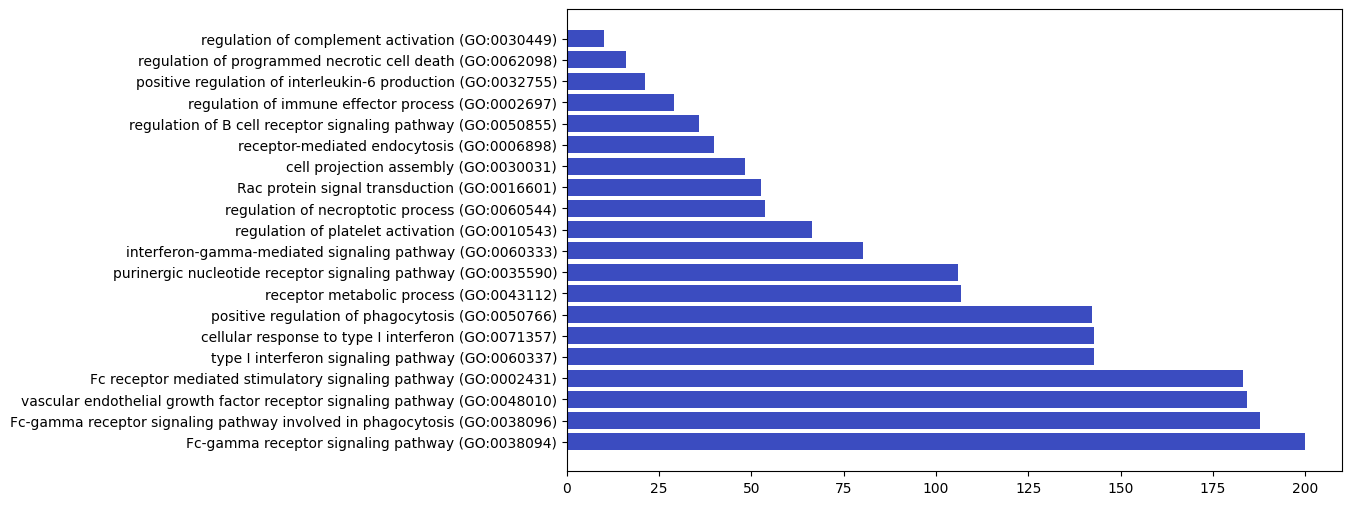

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named out_df_ANANSE_Zeb2
top_n = 20  # Change this value to plot the top n rows

# Sort the DataFrame by the 'nes' column in descending order and select the top n rows
top_df = out_df_ANANSE_Zeb2.sort_values('nes', ascending=False).head(top_n)

# Scaling the NES values between 10 and 200 for bar height
nes_min = top_df['nes'].min()
nes_max = top_df['nes'].max()
bar_heights = np.interp(top_df['nes'], (nes_min, nes_max), (10, 200))

# Plotting the data
plt.figure(figsize=(10, 6))  # Set the figure size
bar_colors = plt.cm.coolwarm(top_df['fdr'])  # Set bar colors based on FDR values
plt.barh(top_df['Term'], bar_heights, color=bar_colors)
plt.colorbar(label='False Discovery Rate (FDR)')  # Colorbar for FDR values
plt.xlabel('Normalized Enrichment Score (NES)')  # X-axis label
plt.ylabel('Term')  # Y-axis label
plt.title(f'Top {top_n} Enrichment Terms')  # Plot title
plt.tight_layout()  # Adjust the spacing
plt.show()  # Display the plot

/tmp/ipykernel_795519/3712846775.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust the spacing


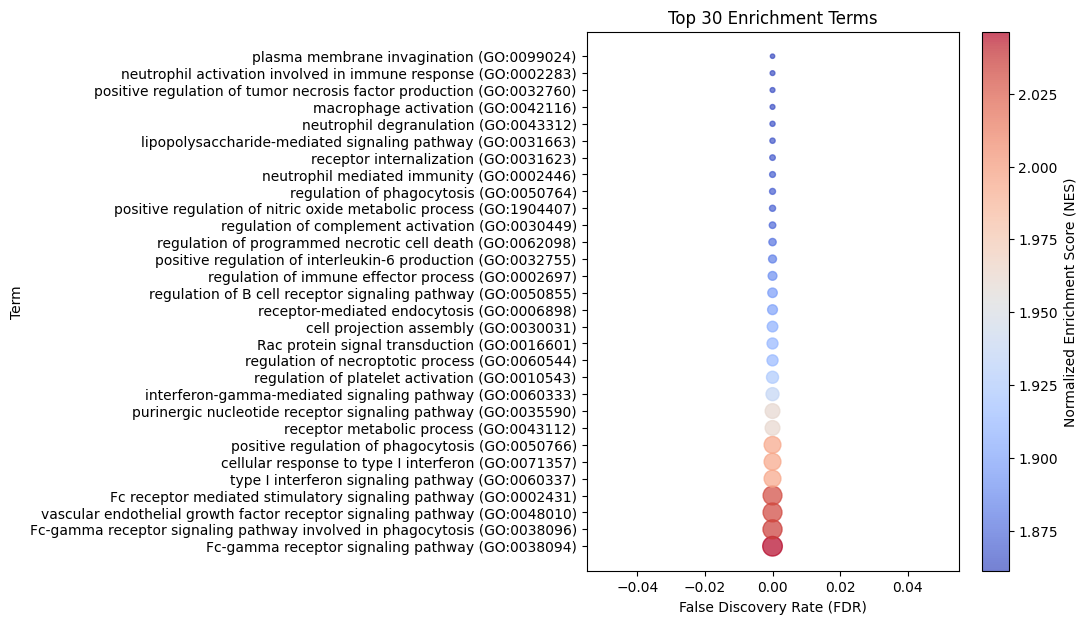

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named out_df_ANANSE_Zeb2
top_n = 30  # Change this value to plot the top n rows

# Sort the DataFrame by the 'nes' column in descending order and select the top n rows
top_df = out_df_ANANSE_Zeb2.sort_values('nes', ascending=False).head(top_n)

# Scaling the NES values between 10 and 200 for dot size
nes_min = top_df['nes'].min()
nes_max = top_df['nes'].max()
dot_sizes = np.interp(top_df['nes'], (nes_min, nes_max), (10, 200))

# Plotting the data
plt.figure(figsize=(6, 7))  # Set the figure size
plt.scatter(top_df['fdr'], top_df['Term'], c=top_df['nes'], s=dot_sizes, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Normalized Enrichment Score (NES)')  # Colorbar for NES values
plt.xlabel('False Discovery Rate (FDR)')  # X-axis label
plt.ylabel('Term')  # Y-axis label
plt.title(f'Top {top_n} Enrichment Terms')  # Plot title
plt.tight_layout()  # Adjust the spacing
plt.show()  # Display the plot


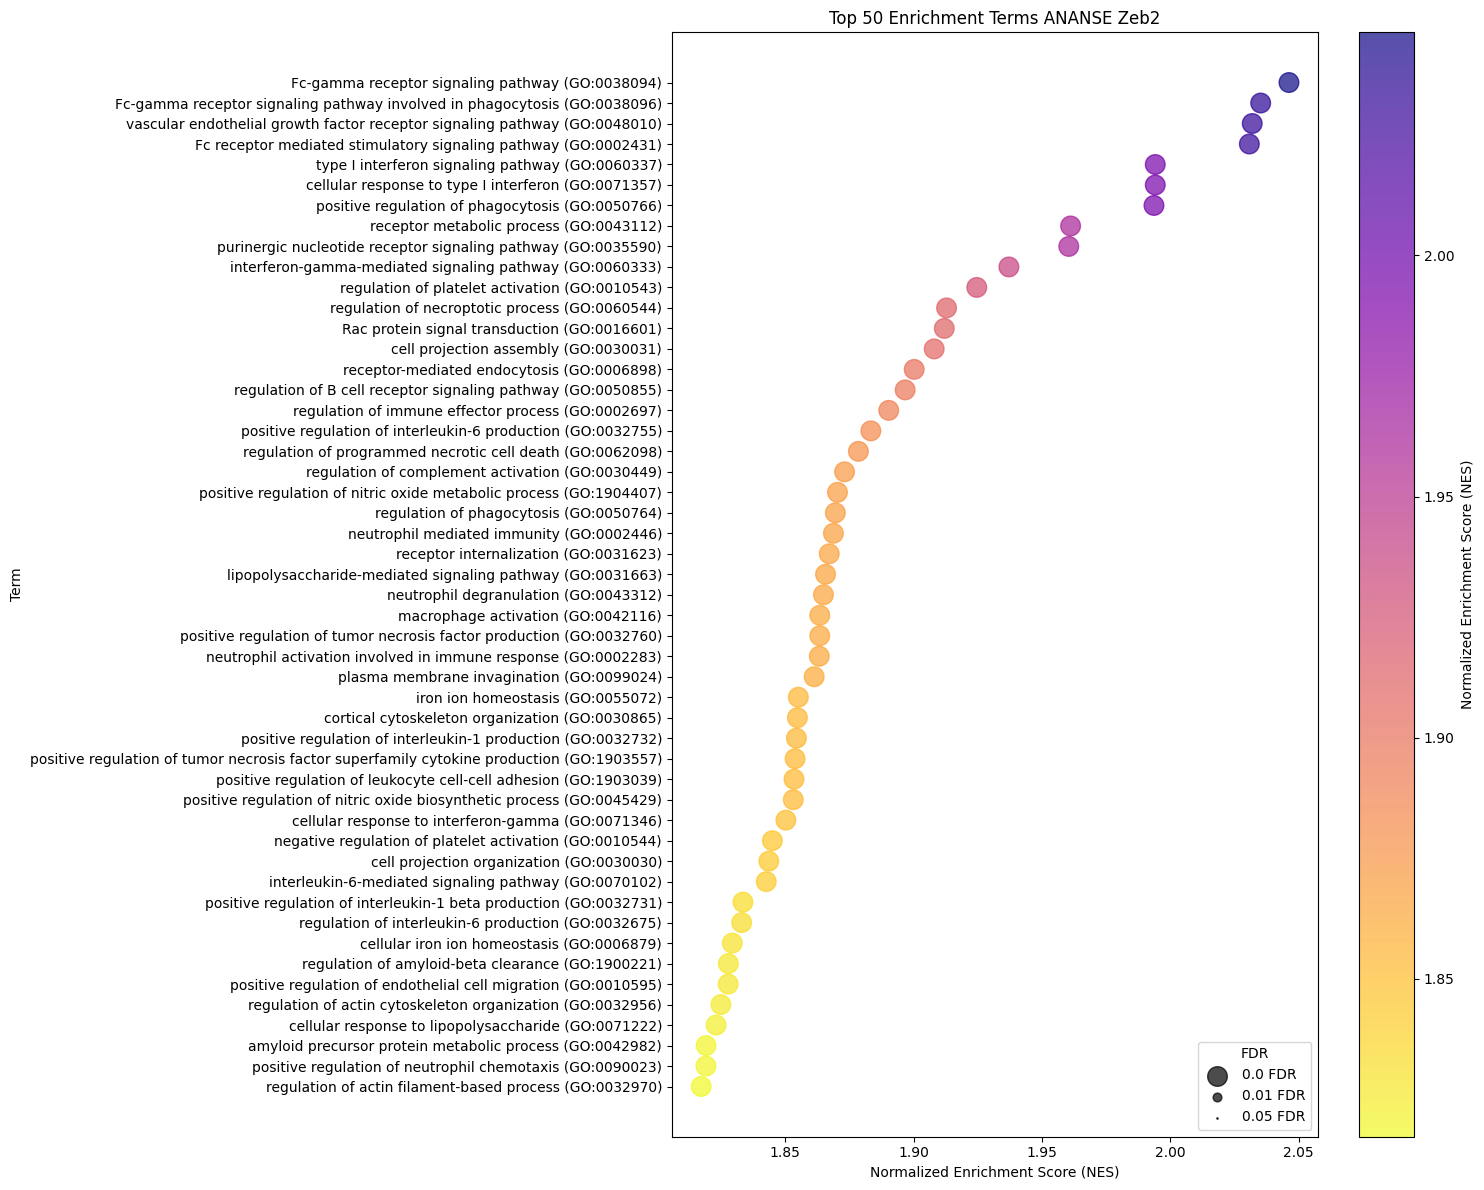

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named out_df_ANANSE_Zeb2
top_n = 50  # Change this value to plot the top n rows

# Sort the DataFrame by the 'nes' column in descending order and select the top n rows
top_df = out_df_ANANSE_Zeb2.sort_values('nes', ascending=False).head(top_n)

# Reverse the order of the DataFrame rows
top_df = top_df.iloc[::-1]

# Scaling the NES values between 10 and 200 for dot size
fdr_min = top_df['fdr'].min()
fdr_max = top_df['fdr'].max()
dot_sizes = np.interp(top_df['fdr'], (0.0, 0.05), (200, 1))
# dot_sizes = np.interp(top_df['fdr'], (fdr_min, fdr_max), (200, 1))

# Plotting the data
plt.figure(figsize=(15, 12))  # Set the figure size
scatter = plt.scatter(top_df['nes'], top_df['Term'], c=top_df['nes'], s=dot_sizes, cmap='plasma_r', alpha=0.7)
#plt.colorbar(scatter, label='False Discovery Rate (FDR)')  # Colorbar for NES values
plt.colorbar(scatter, label='Normalized Enrichment Score (NES)')  # Colorbar for NES values
plt.xlabel('Normalized Enrichment Score (NES)')  # X-axis label
plt.ylabel('Term')  # Y-axis label
plt.title(f'Top {top_n} Enrichment Terms ANANSE Zeb2')  # Plot title

# Create a custom legend for dot sizes
sizes = [200, 39.8, 1]
labels = ['0.0 FDR', '0.01 FDR', '0.05 FDR']
#labels = [fdr_min, (fdr_min+fdr_max)/2, fdr_max]
legend_sizes = [plt.scatter([], [], s=size, color='black', alpha=0.7) for size in sizes]
plt.legend(legend_sizes, labels, title='FDR', loc='lower right')

plt.tight_layout()  # Adjust the spacing

# Save the figure before displaying it
fig1 = plt.gcf()
fig1.savefig(f'../Results/plots/Top{top_n}_EnrichTermsGSEA_ANANSE_Zeb2_selScore.jpg'.format(top_n), format='jpg', dpi=300)
plt.show()
plt.close()

In [16]:
out_df_ANANSE_Zeb2[out_df_ANANSE_Zeb2['Term'].str.contains('ZEB2')]

,Term,fdr,es,nes


In [41]:
term_to_graph = out_df_ANANSE_Zeb2.iloc[1].Term
term_to_graph

'Fc-gamma receptor signaling pathway involved in phagocytosis (GO:0038096)'

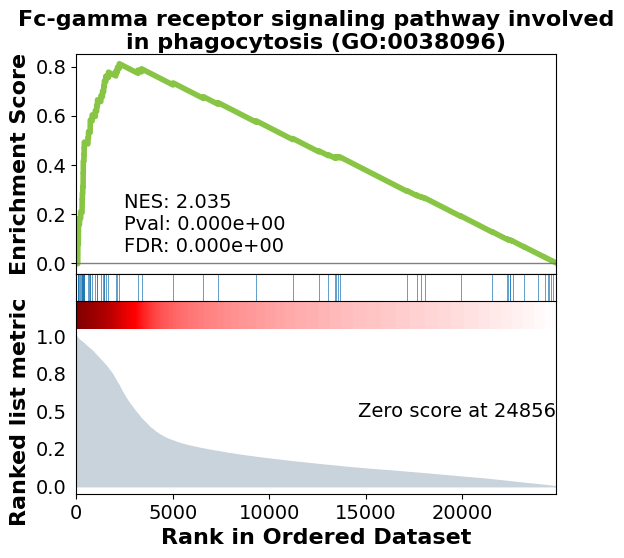

In [42]:
import matplotlib.pyplot as plt

# Set the desired figure size
figsize = (8, 15) 

gseaplot(pre_res_ANANSE.ranking, term = term_to_graph, **pre_res_ANANSE.results[term_to_graph])
# Save the plot
gene = "Zeb2"
term = term_to_graph.replace(' ', '_')
term = term.replace('\\:', '_')
plt.savefig(f'../Results/plots/{gene}_GSEA_ANANSE_selScore_{term}.jpeg', format='jpeg', dpi=400, bbox_inches='tight')

In [43]:
#Example of user set of genes

In [44]:
#this block is just me making a enriched set of genes in the DE upregulated genes
#not required for GSEA
import random

def a_thing(x):
    if x < 0:
        return 1
    else:
        return x
df_ANANSE_Zeb2['weights'] = df_ANANSE_Zeb2.Rank.map(a_thing)

a_list = random.choices(df_ANANSE_Zeb2.Gene.values, k = 100, weights = df_ANANSE_Zeb2.weights.values)


AttributeError: 'DataFrame' object has no attribute 'Rank'

In [6]:
degs = pd.read_csv('../Results/Zeb2_Nr1h3_KO/DEGs/DEG_Zeb2KOvsWT.tsv', sep='\t').dropna() 
degs = degs.rename(columns = {'Unnamed: 0': 'Gene'})
degs = degs.sort_values(by=["p_val_adj","avg_log2FC"],ascending=[True,False]).reset_index(drop=True)

In [7]:
degs_up = degs[(degs.p_val_adj < 0.0000000001) & (degs.avg_log2FC > 0.5)].reset_index(drop=True)
degs_up = degs_up.sort_values(by=["avg_log2FC","p_val_adj"],ascending=[False,True]).reset_index(drop=True)
degs_up.to_csv("../Results/Zeb2_Nr1h3_KO/DEGs/Zeb2_KO_DEG_UpRegSet.tsv", sep="\t", index=True)
degs_up['Gene'] = degs_up['Gene'].str.upper()
degs_up

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,APOC1,0.000000e+00,1.896614,0.975,0.681,0.000000e+00
1,CD163,0.000000e+00,1.509282,0.646,0.184,0.000000e+00
2,CLEC4F,0.000000e+00,1.466776,0.991,0.965,0.000000e+00
3,TIMD4,0.000000e+00,1.403793,0.837,0.315,0.000000e+00
4,C6,0.000000e+00,1.380520,0.812,0.354,0.000000e+00
5,CXCL13,4.937263e-200,1.364472,0.280,0.056,7.370346e-196
6,C4B,0.000000e+00,1.165476,0.552,0.167,0.000000e+00
7,FOLR2,0.000000e+00,1.158348,0.950,0.735,0.000000e+00
8,FABP7,0.000000e+00,1.064839,0.846,0.594,0.000000e+00
9,LST1,0.000000e+00,1.047787,0.946,0.847,0.000000e+00


In [8]:
degs_down = degs[(degs.p_val_adj < 0.0000000001) & (degs.avg_log2FC < -0.5)].reset_index(drop=True)
degs_down = degs_down.sort_values(by=["avg_log2FC","p_val_adj"],ascending=[True,True]).reset_index(drop=True)
degs_down.to_csv("../Results/Zeb2_Nr1h3_KO/DEGs/Zeb2_KO_DEG_DownRegSet.tsv", sep="\t", index=True)
degs_down['Gene'] = degs_down['Gene'].str.upper()
degs_down

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,LSP1,0.000000e+00,-1.607507,0.116,0.618,0.000000e+00
1,S100A11,0.000000e+00,-1.483359,0.067,0.418,0.000000e+00
2,CCR3,0.000000e+00,-1.425448,0.076,0.499,0.000000e+00
3,LPL,0.000000e+00,-1.409567,0.723,0.922,0.000000e+00
4,SIGLECF,0.000000e+00,-1.319834,0.009,0.416,0.000000e+00
...,...,...,...,...,...,...
77,UBC,2.086296e-98,-0.510400,0.799,0.887,3.114423e-94
78,CD300E,4.311148e-83,-0.509156,0.326,0.491,6.435682e-79
79,AMZ1,1.150603e-181,-0.507910,0.052,0.258,1.717621e-177
80,CD36,4.861455e-99,-0.505811,0.209,0.409,7.257180e-95


In [5]:
# Assuming you have already imported the necessary libraries and have the 'degs' dataframe
# Randomly selecting 100 genes/rows
degs['Gene'] = degs['Gene'].str.upper()
degs_random = degs.sample(n=100, random_state=32)  # Adjust the random_state as desired
# Resetting the index of the new dataframe
degs_random = degs_random.reset_index(drop=True)
# Sorting the dataframe by "p_val_adj" and "avg_log2FC" columns (optional)
degs_random = degs_random.sort_values(by=["p_val_adj", "avg_log2FC"], ascending=[True, True]).reset_index(drop=True)
degs_random

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,H3F3B,2.418207e-134,-0.469012,0.946,0.981,3.609899e-130
1,GM10263,1.862662e-58,0.371581,0.446,0.329,2.780582e-54
2,EIF3H,3.412846e-47,-0.281185,0.620,0.740,5.094697e-43
3,4833407H14RIK,3.753761e-41,-0.080816,0.002,0.037,5.603614e-37
4,FKBP2,6.636350e-25,0.218427,0.661,0.601,9.906743e-21
...,...,...,...,...,...,...
95,FBXO18,4.346217e-03,0.029207,0.137,0.141,1.000000e+00
96,EIF3J2,1.016517e-02,0.030680,0.040,0.029,1.000000e+00
97,G6PDX,1.879605e-03,0.032797,0.246,0.249,1.000000e+00
98,SMG7,5.528716e-02,0.039374,0.106,0.096,1.000000e+00


In [54]:
# Randomly sampling 100 rows
random_gene_set = ranking_ANANSE.sample(n=100, random_state=42) 
random_gene_set

,target,selection_score
7125,CH25H,0.237980
24474,WNT2,0.005227
3256,CCDC153,0.469212
21190,DCTN2,0.050145
5140,GARNL3,0.297829
...,...,...
11208,PYM1,0.165840
3690,NRDE2,0.409034
24197,CPD,0.008944
19814,ASMT,0.065802


In [55]:
degs_list_up = list(degs_up["Gene"])
degs_list_down = list(degs_down["Gene"])
degs_list_random = list(random_gene_set["target"])
len(degs_list_up)
len(degs_list_down)
len(degs_list_random)
len(degs)

14928

In [56]:
# We shuffle the ranking to have it as a control
shuffled_ANANSE = ranking_ANANSE.sample(frac=1, random_state=35)
shuffled_ANANSE = shuffled_ANANSE.reset_index(drop=True)
shuffled_ANANSE["selection_score"] = range(len(shuffled_ANANSE))
shuffled_ANANSE

,target,selection_score
0,AGXT,0
1,PXMP4,1
2,SCG5,2
3,ZNHIT6,3
4,ARL15,4
...,...,...
24852,GM45576,24852
24853,GM49369,24853
24854,SPATA1,24854
24855,ACADVL,24855


In [57]:
user_set = {'DEGs KC Zeb2 KO UP' : degs_list_up, 'DEGs KC Zeb2 KO DOWN' : degs_list_down,'RANDOM SET GENES' : degs_list_random,}

In [58]:
# Now with the suffled ranking
shuffle_res_ANANSE = gp.prerank(rnk = shuffled_ANANSE, gene_sets = user_set, seed = 56)
shuffle_res_ANANSE

# Now with the real rank
pre_res_ANANSE = gp.prerank(rnk = ranking_ANANSE, gene_sets = user_set, seed = 28)
pre_res_ANANSE

2023-07-03 15:06:16,037 [WARNING] Duplicated values found in preranked stats: 0.02% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


In [59]:
ranking_res = shuffle_res_ANANSE

out = []

for term in list(ranking_res.results):
    out.append([term,
               ranking_res.results[term]['fdr'],
               ranking_res.results[term]['es'],
               ranking_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df[0:50]

,Term,fdr,es,nes
0,RANDOM SET GENES,0.503168,0.325874,1.148373
1,DEGs KC Zeb2 KO DOWN,0.549183,0.299836,1.050650
2,DEGs KC Zeb2 KO UP,0.806602,0.264282,0.867349


In [60]:
ranking_res = pre_res_ANANSE

out = []

for term in list(ranking_res.results):
    out.append([term,
               ranking_res.results[term]['fdr'],
               ranking_res.results[term]['es'],
               ranking_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df[0:50]

,Term,fdr,es,nes
0,DEGs KC Zeb2 KO UP,0.000000,0.869899,2.092831
1,DEGs KC Zeb2 KO DOWN,0.000000,0.760479,1.913399
2,RANDOM SET GENES,0.681667,0.366690,0.930824


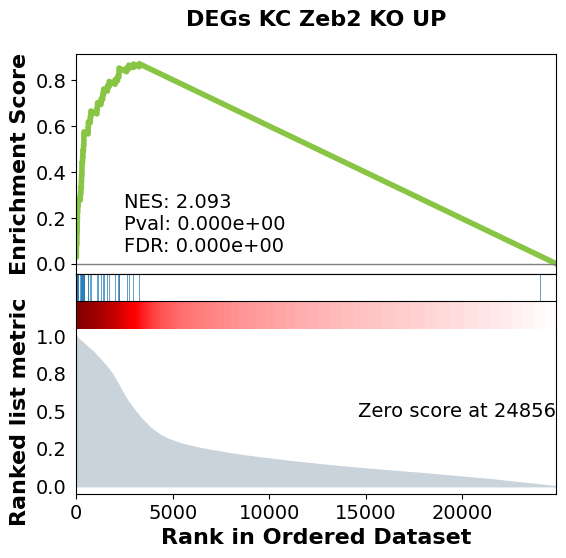

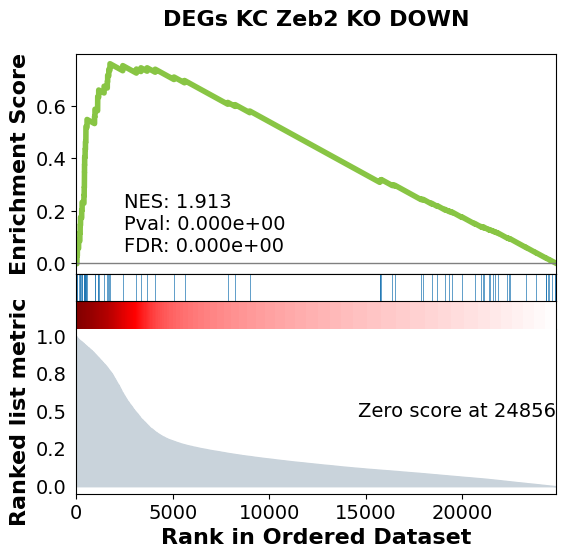

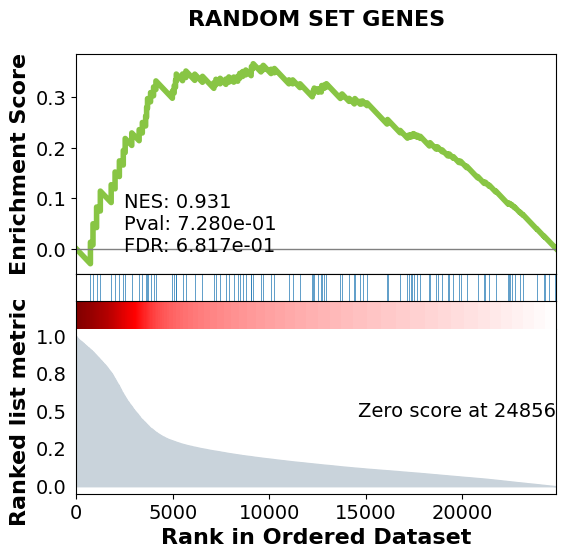

In [61]:
import matplotlib.pyplot as plt

gene = "Zeb2"

# Upregulated genes
term_to_graph = out_df.iloc[0].Term
term_to_graph
term = term_to_graph.replace(' ', '_')
gseaplot(pre_res_ANANSE.ranking, term =  term_to_graph, **pre_res_ANANSE.results[term_to_graph]) #ofname = 'saved_fig.png' 
plt.savefig(f'../Results/plots/{gene}_GSEA_ANANSE_selScore_{term}.jpeg', format='jpeg', dpi=400, bbox_inches='tight')

# Downregulated genes
term_to_graph = out_df.iloc[1].Term
term_to_graph
term = term_to_graph.replace(' ', '_')
gseaplot(pre_res_ANANSE.ranking, term =  term_to_graph, **pre_res_ANANSE.results[term_to_graph]) #ofname = 'saved_fig.png' 
plt.savefig(f'../Results/plots/{gene}_GSEA_ANANSE_selScore_{term}.jpeg', format='jpeg', dpi=400, bbox_inches='tight')

# Random genes
term_to_graph = out_df.iloc[2].Term
term_to_graph
term = term_to_graph.replace(' ', '_')
gseaplot(pre_res_ANANSE.ranking, term =  term_to_graph, **pre_res_ANANSE.results[term_to_graph]) #ofname = 'saved_fig.png' 
plt.savefig(f'../Results/plots/{gene}_GSEA_ANANSE_selScore_{term}.jpeg', format='jpeg', dpi=400, bbox_inches='tight')

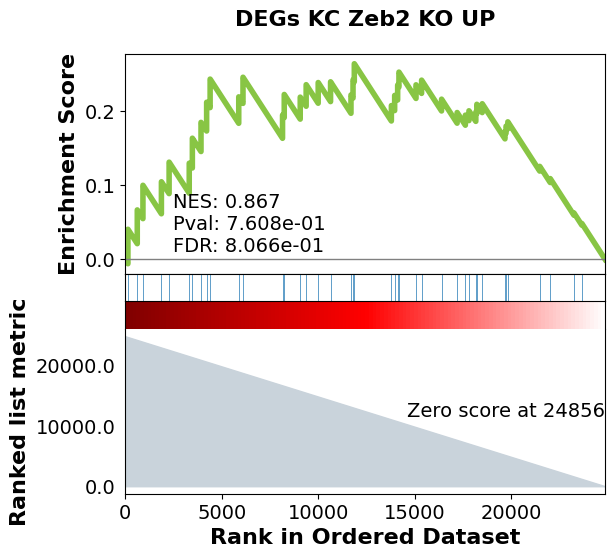

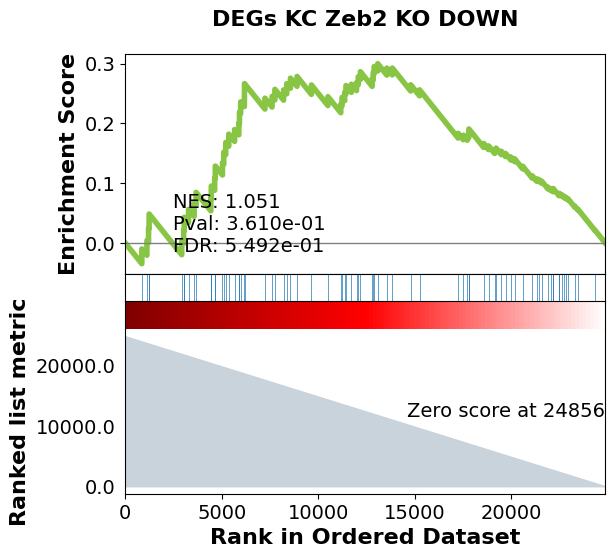

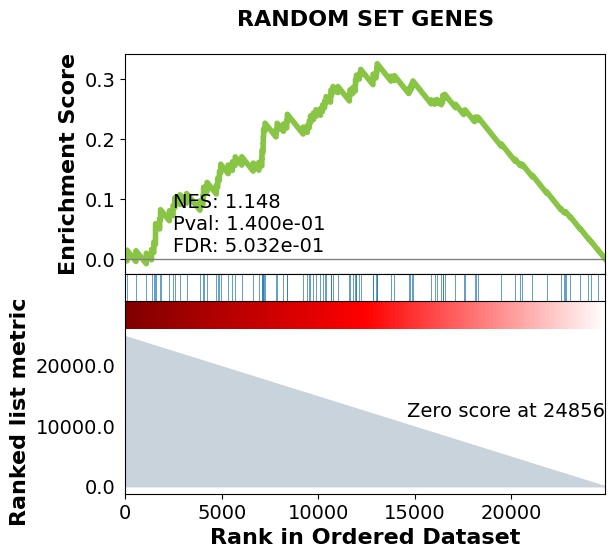

In [62]:
import matplotlib.pyplot as plt

gene = "Zeb2"

# Upregulated genes
term_to_graph = out_df.iloc[0].Term
term_to_graph
term = term_to_graph.replace(' ', '_')
gseaplot(shuffle_res_ANANSE.ranking, term =  term_to_graph, **shuffle_res_ANANSE.results[term_to_graph]) #ofname = 'saved_fig.png' 
plt.savefig(f'../Results/plots/{gene}_GSEA_ANANSE_shuffle_{term}.jpeg', format='jpeg', dpi=400, bbox_inches='tight')

# Downregulated genes
term_to_graph = out_df.iloc[1].Term
term_to_graph
term = term_to_graph.replace(' ', '_')
gseaplot(shuffle_res_ANANSE.ranking, term =  term_to_graph, **shuffle_res_ANANSE.results[term_to_graph]) #ofname = 'saved_fig.png' 
plt.savefig(f'../Results/plots/{gene}_GSEA_ANANSE_shuffle_{term}.jpeg', format='jpeg', dpi=400, bbox_inches='tight')

# Random genes
term_to_graph = out_df.iloc[2].Term
term_to_graph
term = term_to_graph.replace(' ', '_')
gseaplot(shuffle_res_ANANSE.ranking, term =  term_to_graph, **shuffle_res_ANANSE.results[term_to_graph]) #ofname = 'saved_fig.png' 
plt.savefig(f'../Results/plots/{gene}_GSEA_ANANSE_shuffle_{term}.jpeg', format='jpeg', dpi=400, bbox_inches='tight')

In [82]:
#degs_down = degs[(degs.p_val_adj < 0.01) & (degs.avg_log2FC < -0)].reset_index(drop=True)
degs_down = degs[(degs.avg_log2FC < -0)].reset_index(drop=True)
degs_down = degs_down.sort_values(by=["avg_log2FC", "p_val_adj"],ascending=[True,True]).reset_index(drop=True)
degs_down

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,LSP1,0.000000,-1.607507e+00,0.116,0.618,0.000000
1,S100A11,0.000000,-1.483359e+00,0.067,0.418,0.000000
2,CCR3,0.000000,-1.425448e+00,0.076,0.499,0.000000
3,LPL,0.000000,-1.409567e+00,0.723,0.922,0.000000
4,SIGLECF,0.000000,-1.319834e+00,0.009,0.416,0.000000
...,...,...,...,...,...,...
8080,TRIM65,0.000025,-1.116130e-05,0.064,0.077,0.366255
8081,ARMC2,0.837952,-1.071004e-05,0.008,0.007,1.000000
8082,ZFP607,0.099827,-1.065561e-05,0.022,0.025,1.000000
8083,GM15648,0.945703,-7.299966e-06,0.002,0.001,1.000000


In [87]:
#degs_up = degs[(degs.p_val_adj < 0.01) & (degs.avg_log2FC > 0)].reset_index(drop=True)
degs_up = degs[(degs.avg_log2FC > 0)].reset_index(drop=True)
degs_up = degs_up.sort_values(by=["avg_log2FC", "p_val_adj"],ascending=[False,True]).reset_index(drop=True)
degs_up

,Gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
0,APOC1,0.000000,1.896614,0.975,0.681,0.0
1,CD163,0.000000,1.509282,0.646,0.184,0.0
2,CLEC4F,0.000000,1.466776,0.991,0.965,0.0
3,TIMD4,0.000000,1.403793,0.837,0.315,0.0
4,C6,0.000000,1.380520,0.812,0.354,0.0
...,...,...,...,...,...,...
6838,HS3ST3A1,0.919057,0.000013,0.001,0.001,1.0
6839,DDX25,0.828036,0.000008,0.001,0.002,1.0
6840,ZBTB49,0.323194,0.000008,0.014,0.016,1.0
6841,2310022B05RIK,0.030654,0.000007,0.035,0.040,1.0


In [93]:
degs_GO = degs_down[["Gene", "avg_log2FC"]]
degs_GO
degs_GO

pre_res_DEGs = gp.prerank(rnk = degs_GO, gene_sets = 'GO_Biological_Process_2021', seed = 12, permutation_num = 100)
# pre_res_DEGs = gp.prerank(rnk = degs_GO, gene_sets = 'TF_Perturbations_Followed_by_Expression', seed = 27, permutation_num = 100)
# pre_res_DEGs = gp.prerank(rnk = degs_GO, gene_sets = 'WikiPathways_2019_Mouse', seed = 27, permutation_num = 100)
# pre_res_DEGs = gp.prerank(rnk = degs_GO, gene_sets = 'ChEA_2022', seed = 27, permutation_num = 100)
# pre_res_DEGs = gp.prerank(rnk = degs_GO, gene_sets = 'Reactome_2022', seed = 27, permutation_num = 100)
# pre_res_DEGs = gp.prerank(rnk = degs_GO, gene_sets = 'KEGG_2021_Human', seed = 27, permutation_num = 100)
degs_GO

out = []

for term in list(pre_res_DEGs.results):
    out.append([term,
               pre_res_DEGs.results[term]['fdr'],
               pre_res_DEGs.results[term]['es'],
               pre_res_DEGs.results[term]['nes']])

out_df_DEGS_Zeb2 = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('nes', ascending=False).reset_index(drop = True)
out_df_DEGS_Zeb2[0:50]

,Term,fdr,es,nes
0,regulation of chromosome organization (GO:0033...,0.013514,0.297893,1.217215
1,synaptic vesicle recycling (GO:0036465),0.878378,0.349690,1.000000
2,regulation of smoothened signaling pathway (GO...,0.999758,-0.256384,-0.427760
3,positive regulation of cytokine production inv...,1.000000,-0.277339,-0.458765
4,rRNA methylation (GO:0031167),0.999054,-0.303151,-0.515793
5,tRNA aminoacylation for protein translation (G...,0.999421,-0.315246,-0.524017
6,RNA methylation (GO:0001510),0.997076,-0.318167,-0.565120
7,secondary alcohol biosynthetic process (GO:190...,0.995588,-0.370850,-0.584271
8,regulation of cilium assembly (GO:1902017),0.995673,-0.344806,-0.589966
9,cholesterol biosynthetic process (GO:0006695),0.996363,-0.374023,-0.590212


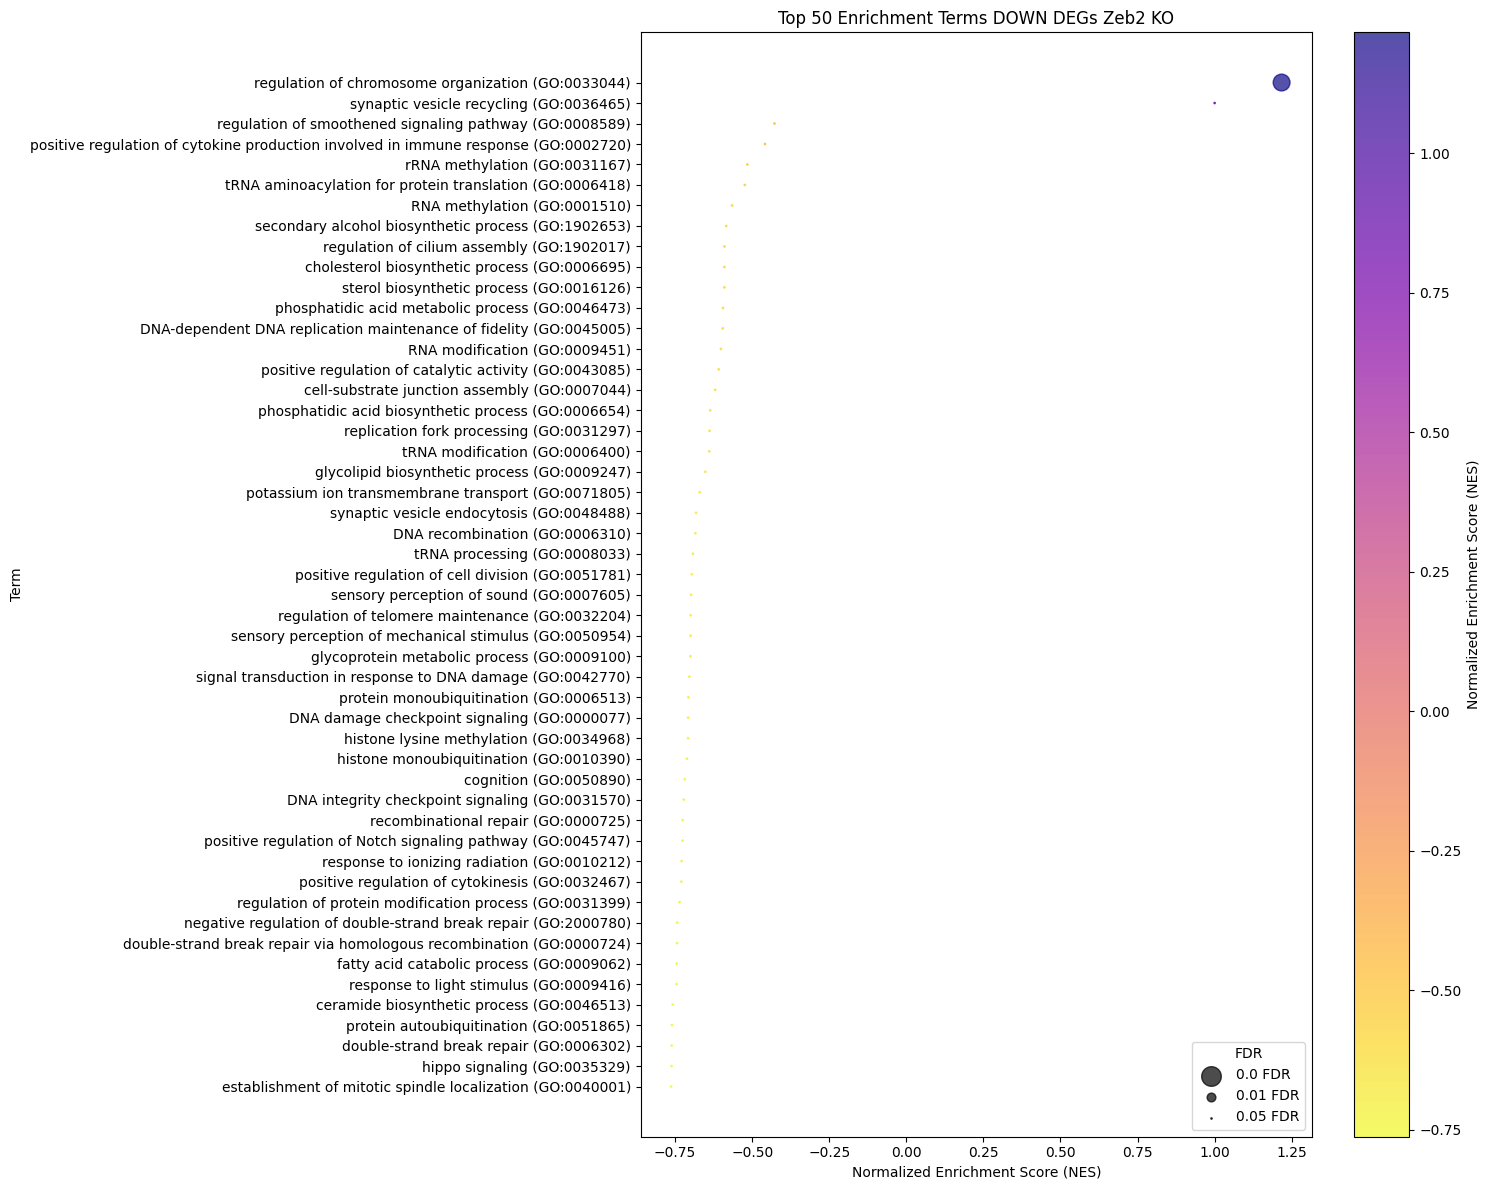

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named out_df_ANANSE_Zeb2
top_n = 50  # Change this value to plot the top n rows

# Sort the DataFrame by the 'nes' column in descending order and select the top n rows
top_df = out_df_DEGS_Zeb2.sort_values('nes', ascending=False).head(top_n)

# Reverse the order of the DataFrame rows
top_df = top_df.iloc[::-1]

# Scaling the NES values between 10 and 200 for dot size
fdr_min = top_df['fdr'].min()
fdr_max = top_df['fdr'].max()
dot_sizes = np.interp(top_df['fdr'], (0.0, 0.05), (200, 1))
# dot_sizes = np.interp(top_df['fdr'], (fdr_min, fdr_max), (200, 1))

# Plotting the data
plt.figure(figsize=(15, 12))  # Set the figure size
scatter = plt.scatter(top_df['nes'], top_df['Term'], c=top_df['nes'], s=dot_sizes, cmap='plasma_r', alpha=0.7)
#plt.colorbar(scatter, label='False Discovery Rate (FDR)')  # Colorbar for NES values
plt.colorbar(scatter, label='Normalized Enrichment Score (NES)')  # Colorbar for NES values
plt.xlabel('Normalized Enrichment Score (NES)')  # X-axis label
plt.ylabel('Term')  # Y-axis label
plt.title(f'Top {top_n} Enrichment Terms DOWN DEGs Zeb2 KO')  # Plot title

# Create a custom legend for dot sizes
sizes = [200, 39.8, 1]
labels = ['0.0 FDR', '0.01 FDR', '0.05 FDR']
#labels = [fdr_min, (fdr_min+fdr_max)/2, fdr_max]
legend_sizes = [plt.scatter([], [], s=size, color='black', alpha=0.7) for size in sizes]
plt.legend(legend_sizes, labels, title='FDR', loc='lower right')

plt.tight_layout()  # Adjust the spacing

# Save the figure before displaying it
fig1 = plt.gcf()
fig1.savefig(f'../Results/plots/Top{top_n}_EnrichTermsGSEA_DEGS_DOWN_Zeb2.jpg'.format(top_n), format='jpg', dpi=300)
plt.show()
plt.close()